In [1]:
import os
os.chdir('./../../..')

In [2]:
import pandas as pd
import seaborn as sns
from src.data.data import raw_dataset_path

In [3]:
df = pd.read_csv(f"{raw_dataset_path}/spotify_recsys2018/playlists.csv", sep='\t', lineterminator='\r', usecols=['num_tracks', 'pid'])

# Analysis of playlists lenghts on the Spotify Recsys Challenge 2018 dataset

- It contains real playlists from Spotify;
- It is the dataset we use in tfp offline experiments.

## We carry out some analysis useful to justify some choices that we made:
- restring ourselves to only playlist shorter than 50 tracks;
- dividing in sub-buckets of fixed size: [ 3-10 ; 11-25 ; 26-50 ].

In [4]:
df

,pid,num_tracks
0,0,52
1,1,39
2,2,64
3,3,126
4,4,17
...,...,...
999995,999995,32
999996,999996,122
999997,999997,24
999998,999998,11


In [5]:
print(f"Max playlist length: {max(df.num_tracks)}")
print(f"Min playlist length: {min(df.num_tracks)}")

Max playlist length: 376
Min playlist length: 5


Distribution (plain and comulative):

In [6]:
sns.histplot(df, x='num_tracks')

<AxesSubplot:xlabel='num_tracks', ylabel='Count'>

<AxesSubplot:xlabel='num_tracks', ylabel='Count'>

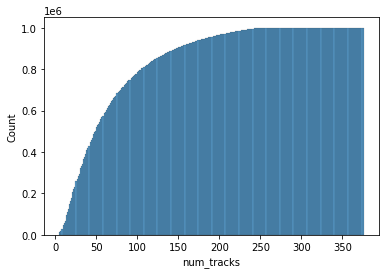

In [10]:
sns.histplot(df, x='num_tracks', cumulative=True)

In [14]:
count_num_tracks=[0]*(max(df.num_tracks)+1)
for n_tracks in df.num_tracks:
    count_num_tracks[n_tracks]+=1
cumulative_count_num_tracks = [sum(count_num_tracks[:idx+1]) for idx in range(len(count_num_tracks))]

50% of the playlist has less than 50 tracks, to be precise:

In [18]:
cumulative_count_num_tracks[49]/1000000

0.503549

**So restricting ourselves to story of less than 50 tracks is somehow limitating. However, it is questionable the utility of a story longer than 50 tracks**

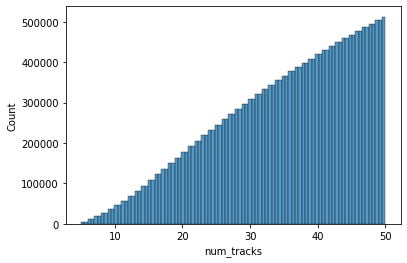

In [30]:
sns.histplot(df[df.num_tracks <= 50], x='num_tracks', cumulative=True)

In [57]:
print(f"First bucket (3-10) contains only {cumulative_count_num_tracks[10]/1000000} of the playlists. Bad choice!")

First bucket (3-10) contains only 0.036008 of the playlists. Bad choice!


### Let's pick better buckets

In [49]:
print(f"Cut at 20: {cumulative_count_num_tracks[20]/1000000}")

Cut at 20: 0.163687


In [50]:
print(f"Cut at 33: {cumulative_count_num_tracks[33]/1000000}")

Cut at 33: 0.332594


In [51]:
print(f"Cut at 50: {cumulative_count_num_tracks[50]/1000000}")

Cut at 50: 0.503549


So, if we want to cut the playlists in three buckets of even size, these should be: **[ 3-19; 20-32; 33-50 ]**